In [ ]:
#COMPREHENSIVE TITANIC DATA ANALYSIS PROJECT

In [ ]:
# IMPORTS AND SETUP

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
try:
    import missingno as msno
except ImportError:
    print("Warning: missingno not available. Install with: pip install missingno")
    msno = None

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Constants
DATASET_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
OUTPUT_FILENAME = 'enhanced_titanic_dataset.csv'
RANDOM_SEED = 42

def display_success_message():
    """Display setup confirmation message."""
    print("Environment Setup Complete!")
    print("=" * 50)
    print(f"Pandas Version: {pd.__version__}")
    print(f"NumPy Version: {np.__version__}")
    print(f"Matplotlib Backend: {plt.get_backend()}")
    print("=" * 50)

display_success_message()

Environment Setup Complete!
Pandas Version: 2.2.3
NumPy Version: 2.2.2
Matplotlib Backend: module://matplotlib_inline.backend_inline


In [ ]:
# DATA LOADING AND VALIDATION

In [9]:
class DataLoader:
    """Handles data loading and initial validation."""
    
    def __init__(self, data_source):
        self.data_source = data_source
        self.dataset = None
    
    def load_dataset(self):
        """Load dataset from source and perform basic validation."""
        try:
            self.dataset = pd.read_csv(self.data_source)
            self._validate_dataset()
            return self.dataset
        except Exception as error:
            print(f"Error loading dataset: {error}")
            return None
    
    def _validate_dataset(self):
        """Validate the loaded dataset."""
        if self.dataset is not None:
            print("Dataset Loaded Successfully!")
            print("-" * 40)
            print(f"Dataset Shape: {self.dataset.shape}")
            print(f"Total Passengers: {len(self.dataset):,}")
            print(f"Number of Features: {len(self.dataset.columns)}")
            print(f"Memory Usage: {self.dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load the data
data_loader = DataLoader(DATASET_URL)
titanic_data = data_loader.load_dataset()


Dataset Loaded Successfully!
----------------------------------------
Dataset Shape: (891, 12)
Total Passengers: 891
Number of Features: 12
Memory Usage: 0.28 MB


In [ ]:
# DATA EXPLORATION UTILITIES

In [10]:
class DataExplorer:
    """Comprehensive data exploration and analysis utilities."""
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.numerical_columns = self._identify_numerical_columns()
        self.categorical_columns = self._identify_categorical_columns()
    
    def _identify_numerical_columns(self):
        """Identify numerical columns in the dataset."""
        return self.dataframe.select_dtypes(include=[np.number]).columns.tolist()
    
    def _identify_categorical_columns(self):
        """Identify categorical columns in the dataset."""
        return self.dataframe.select_dtypes(include=['object']).columns.tolist()
    
    def display_basic_info(self):
        """Display comprehensive dataset information."""
        print("\nDATASET OVERVIEW")
        print("=" * 60)
        
        # First and last rows preview
        print("\nSample Data (First 5 Rows):")
        print("-" * 40)
        print(self.dataframe.head())
        
        print("\nSample Data (Last 5 Rows):")
        print("-" * 40)
        print(self.dataframe.tail())
        
        # Dataset structure
        print(f"\nDataset Information:")
        print("-" * 40)
        print(self.dataframe.info())
        
        # Statistical summary
        print(f"\nStatistical Summary:")
        print("-" * 40)
        print(self.dataframe.describe())
    
    def analyze_data_quality(self):
        """Comprehensive data quality assessment."""
        print("\nDATA QUALITY ASSESSMENT")
        print("=" * 60)
        
        # Missing values analysis
        missing_values_summary = self._analyze_missing_values()
        
        # Duplicate records check
        duplicate_count = self.dataframe.duplicated().sum()
        print(f"\nDuplicate Records: {duplicate_count}")
        
        # Data types overview
        print(f"\nColumn Data Types:")
        print("-" * 30)
        for column_name, data_type in self.dataframe.dtypes.items():
            print(f"{column_name:<15}: {str(data_type)}")
        
        return missing_values_summary
    
    def _analyze_missing_values(self):
        """Analyze missing values in the dataset."""
        missing_counts = self.dataframe.isnull().sum()
        missing_percentages = (missing_counts / len(self.dataframe)) * 100
        
        missing_summary = pd.DataFrame({
            'Missing_Count': missing_counts,
            'Missing_Percentage': missing_percentages
        })
        
        # Filter only columns with missing values
        missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
        missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)
        
        if not missing_summary.empty:
            print(f"\nMissing Values Analysis:")
            print("-" * 40)
            print(missing_summary)
        else:
            print(f"\nNo Missing Values Found!")
        
        return missing_summary

# Initialize explorer
if titanic_data is not None:
    data_explorer = DataExplorer(titanic_data)
    data_explorer.display_basic_info()
    missing_data_info = data_explorer.analyze_data_quality()


DATASET OVERVIEW

Sample Data (First 5 Rows):
----------------------------------------
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   N

In [ ]:
# DATA VISUALIZATION UTILITIES


MISSING DATA VISUALIZATION


<Figure size 1200x800 with 0 Axes>

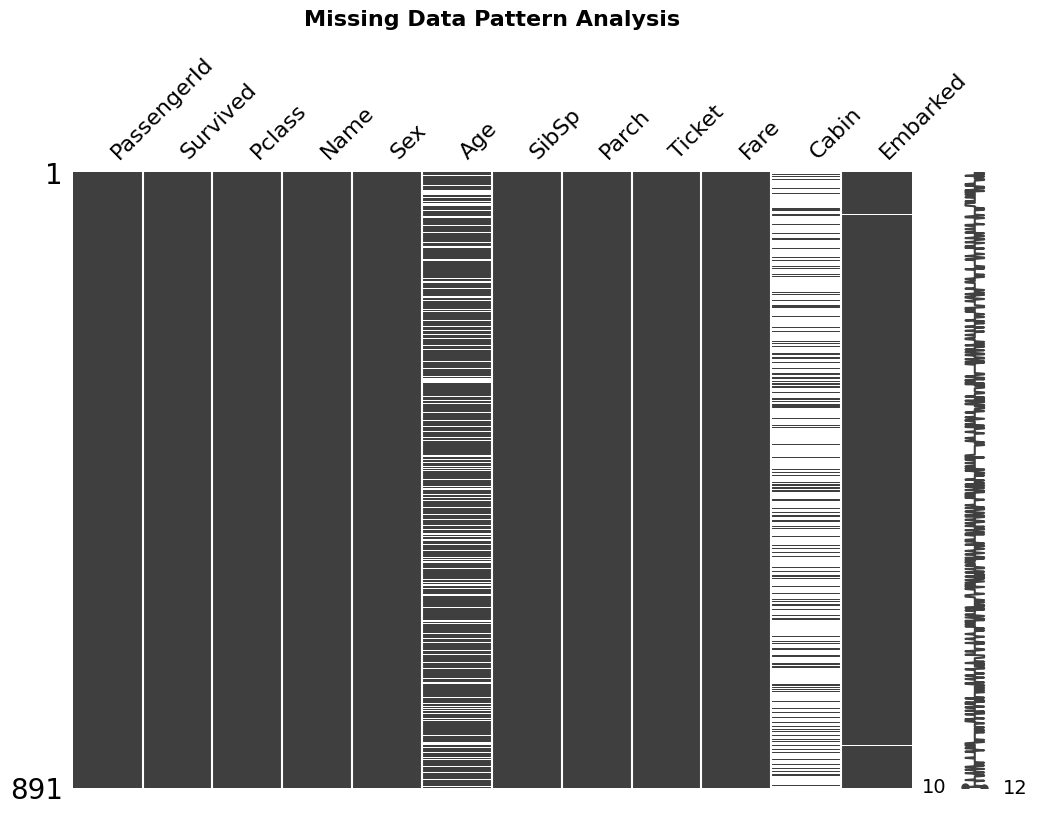

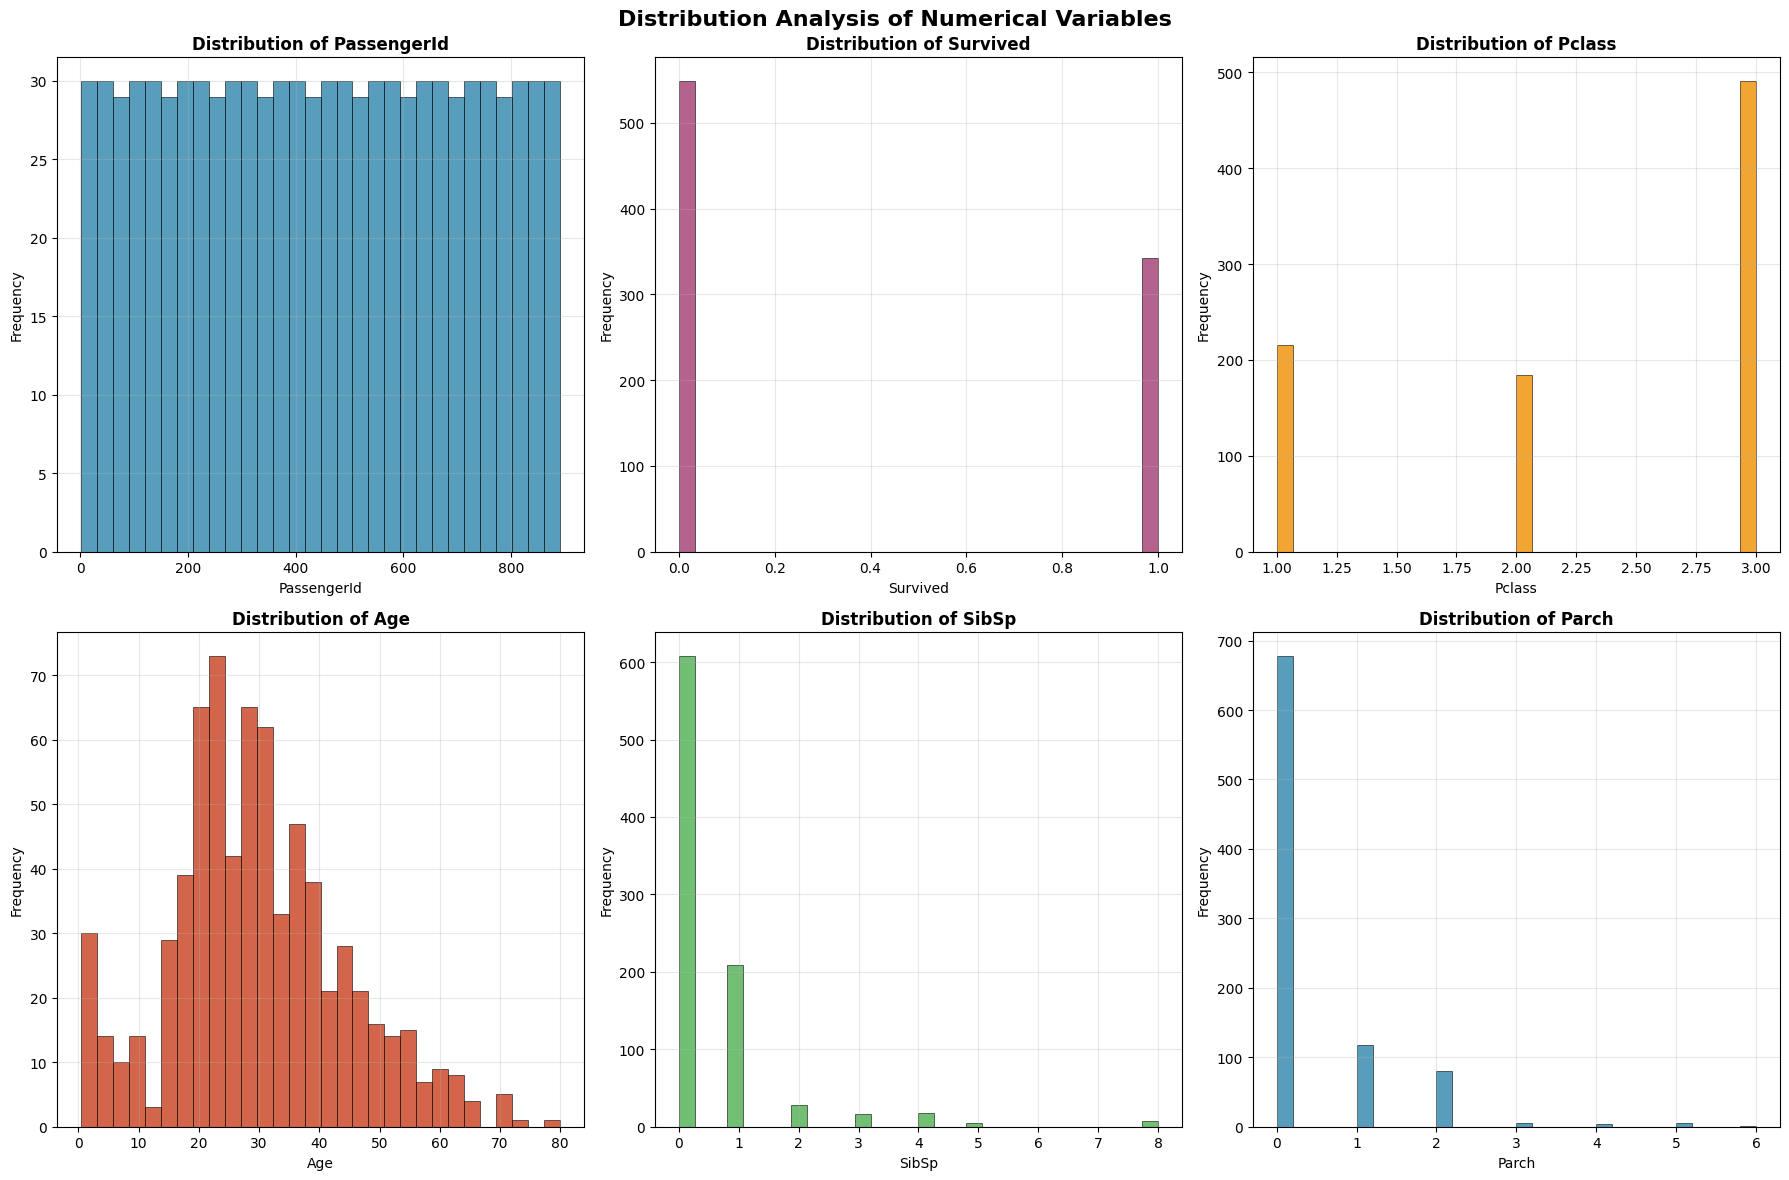

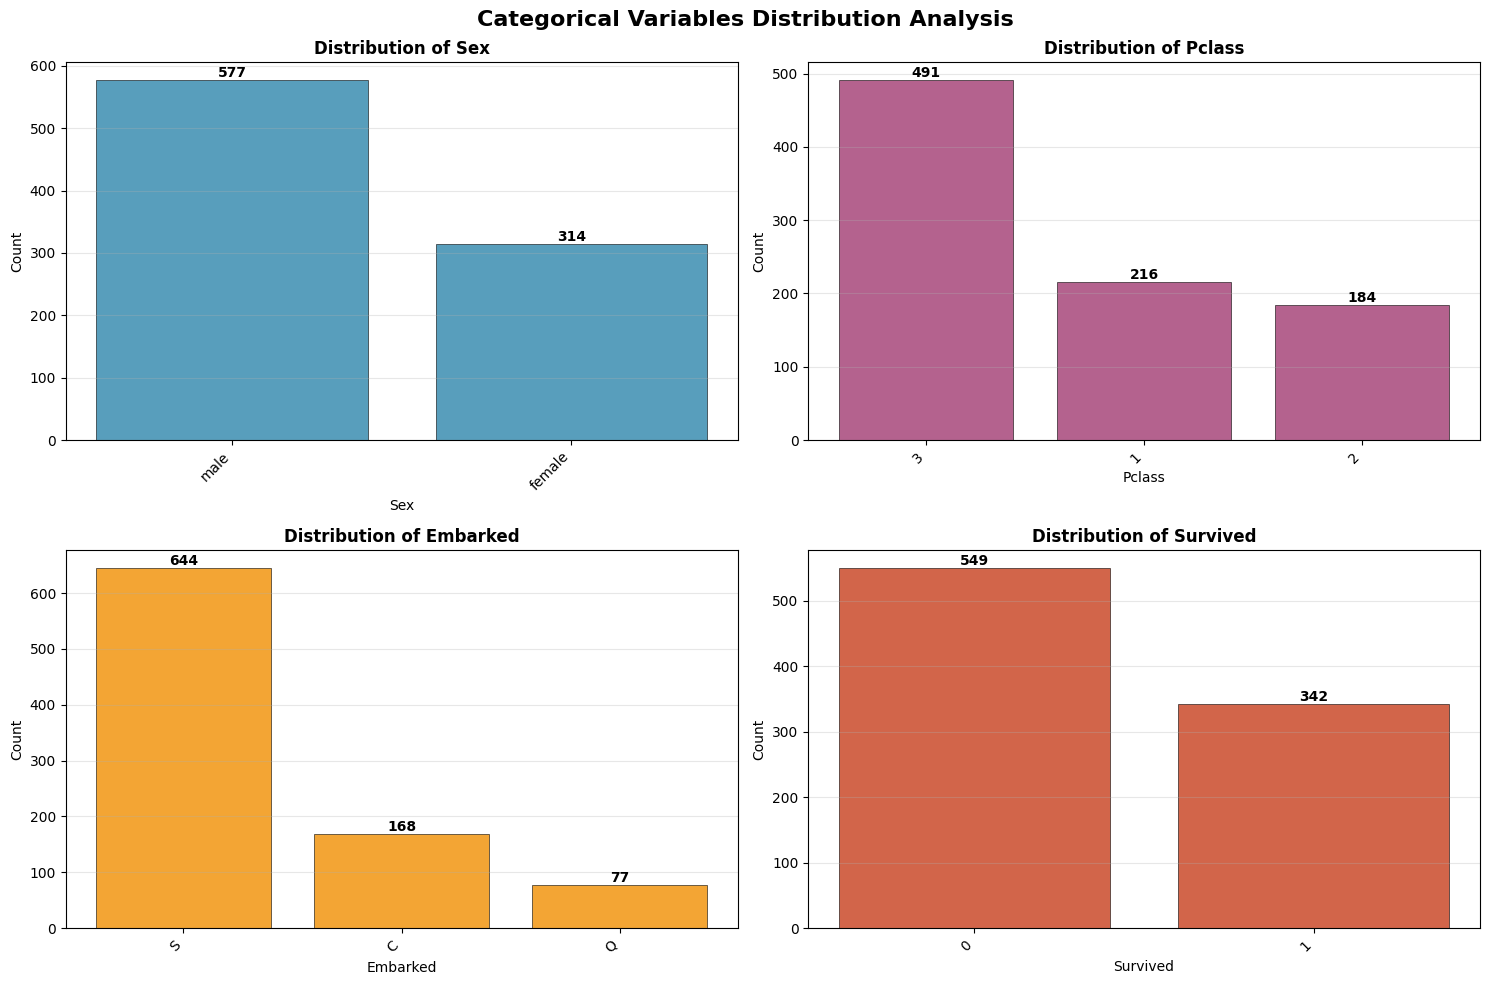

In [11]:
class DataVisualizer:
    """Professional data visualization utilities."""
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.figure_size_large = (15, 10)
        self.figure_size_medium = (12, 8)
        self.figure_size_small = (10, 6)
        self.color_palette = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#4CAF50']
    
    def visualize_missing_data_pattern(self):
        """Create professional missing data visualization."""
        print("\nMISSING DATA VISUALIZATION")
        print("=" * 50)
        
        if msno is not None:
            plt.figure(figsize=self.figure_size_medium)
            msno.matrix(self.dataframe, figsize=self.figure_size_medium)
            plt.title('Missing Data Pattern Analysis', fontsize=16, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()
        else:
            # Alternative visualization without missingno
            missing_data = self.dataframe.isnull().sum()
            missing_data = missing_data[missing_data > 0]
            
            if not missing_data.empty:
                plt.figure(figsize=self.figure_size_small)
                missing_data.plot(kind='bar', color='skyblue', edgecolor='black')
                plt.title('Missing Data Count by Column', fontsize=14, fontweight='bold')
                plt.ylabel('Missing Values Count')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
    
    def create_distribution_plots(self, columns_to_plot=None):
        """Create distribution plots for numerical variables."""
        if columns_to_plot is None:
            numerical_columns = self.dataframe.select_dtypes(include=[np.number]).columns
            columns_to_plot = numerical_columns[:6]  # Limit to first 6 columns
        
        num_columns = len(columns_to_plot)
        if num_columns == 0:
            print("No numerical columns found for plotting.")
            return
            
        rows = (num_columns + 2) // 3
        cols = min(num_columns, 3)
        
        fig, axes = plt.subplots(rows, cols, figsize=(18, 6*rows))
        fig.suptitle('Distribution Analysis of Numerical Variables', 
                    fontsize=16, fontweight='bold', y=0.98)
        
        # Handle single subplot case
        if num_columns == 1:
            axes = [axes]
        elif rows == 1 and cols > 1:
            axes = axes.flatten()
        elif rows > 1:
            axes = axes.flatten()
        
        for idx, column in enumerate(columns_to_plot):
            current_ax = axes[idx] if num_columns > 1 else axes[0]
            
            # Create histogram with enhanced styling
            self.dataframe[column].hist(
                bins=30, 
                ax=current_ax, 
                alpha=0.8, 
                color=self.color_palette[idx % len(self.color_palette)],
                edgecolor='black',
                linewidth=0.5
            )
            
            current_ax.set_title(f'Distribution of {column}', fontweight='bold', fontsize=12)
            current_ax.set_xlabel(column, fontsize=10)
            current_ax.set_ylabel('Frequency', fontsize=10)
            current_ax.grid(True, alpha=0.3)
        
        # Hide empty subplots
        for idx in range(num_columns, len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def create_categorical_distribution_plots(self):
        """Create enhanced categorical variable distribution plots."""
        categorical_columns_to_plot = ['Sex', 'Pclass', 'Embarked', 'Survived']
        available_columns = [col for col in categorical_columns_to_plot 
                            if col in self.dataframe.columns]
        
        if not available_columns:
            print("No categorical columns found for visualization.")
            return
        
        num_plots = min(len(available_columns), 4)
        fig, axes = plt.subplots(2, 2, figsize=self.figure_size_large)
        fig.suptitle('Categorical Variables Distribution Analysis', 
                    fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        for idx, column in enumerate(available_columns[:4]):
            current_ax = axes[idx]
            
            # Create bar plot with enhanced styling
            value_counts = self.dataframe[column].value_counts()
            bars = current_ax.bar(
                range(len(value_counts)), 
                value_counts.values,
                color=self.color_palette[idx],
                alpha=0.8,
                edgecolor='black',
                linewidth=0.5
            )
            
            # Set x-axis labels
            current_ax.set_xticks(range(len(value_counts)))
            current_ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
            
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                current_ax.text(bar.get_x() + bar.get_width()/2., height,
                               f'{int(height)}',
                               ha='center', va='bottom', fontweight='bold')
            
            current_ax.set_title(f'Distribution of {column}', fontweight='bold', fontsize=12)
            current_ax.set_xlabel(column, fontsize=10)
            current_ax.set_ylabel('Count', fontsize=10)
            current_ax.grid(True, alpha=0.3, axis='y')
        
        # Hide unused subplots
        for idx in range(num_plots, 4):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

# Initialize visualizer
if titanic_data is not None:
    data_visualizer = DataVisualizer(titanic_data)
    data_visualizer.visualize_missing_data_pattern()
    data_visualizer.create_distribution_plots()
    data_visualizer.create_categorical_distribution_plots()


In [ ]:
# ADVANCED ANALYSIS AND FEATURE ENGINEERING

In [12]:
class FeatureEngineer:
    """Advanced feature engineering and analysis."""
    
    def __init__(self, dataframe):
        self.dataframe = dataframe.copy()
    
    def create_enhanced_features(self):
        """Create meaningful derived features for better analysis."""
        print("\nFEATURE ENGINEERING")
        print("=" * 50)
        
        # Age categorization
        self.dataframe['Age_Group'] = pd.cut(
            self.dataframe['Age'], 
            bins=[0, 12, 18, 35, 50, 100], 
            labels=['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior'],
            include_lowest=True
        )
        
        # Family size analysis
        self.dataframe['Family_Size'] = self.dataframe['SibSp'] + self.dataframe['Parch'] + 1
        self.dataframe['Is_Alone'] = (self.dataframe['Family_Size'] == 1).astype(int)
        
        # Family size categories
        self.dataframe['Family_Size_Category'] = pd.cut(
            self.dataframe['Family_Size'],
            bins=[0, 1, 4, 20],
            labels=['Alone', 'Small_Family', 'Large_Family'],
            include_lowest=True
        )
        
        # Title extraction from names
        if 'Name' in self.dataframe.columns:
            self.dataframe['Title'] = self.dataframe['Name'].str.extract(
                r', ([A-Za-z\s]+)\.', expand=False
            )
        
        # Fare categories
        if 'Fare' in self.dataframe.columns:
            fare_median = self.dataframe['Fare'].median()
            fare_filled = self.dataframe['Fare'].fillna(fare_median)
            self.dataframe['Fare_Category'] = pd.qcut(
                fare_filled,
                q=4,
                labels=['Low_Fare', 'Medium_Fare', 'High_Fare', 'Premium_Fare']
            )
        
        print("Feature Engineering Complete!")
        print("New Features Added: Age_Group, Family_Size, Is_Alone, Family_Size_Category, Fare_Category")
        
        return self.dataframe

# Apply feature engineering
if titanic_data is not None:
    feature_engineer = FeatureEngineer(titanic_data)
    enhanced_titanic_data = feature_engineer.create_enhanced_features()



FEATURE ENGINEERING
Feature Engineering Complete!
New Features Added: Age_Group, Family_Size, Is_Alone, Family_Size_Category, Fare_Category


In [ ]:
# SURVIVAL ANALYSIS


SURVIVAL ANALYSIS
Overall Statistics:
------------------------------
Total Passengers: 891
Survivors: 342
Overall Survival Rate: 38.38%

Survival Rate by Sex:
----------------------------------------
female              :  74.20%
male                :  18.89%

Survival Rate by Pclass:
----------------------------------------
1                   :  62.96%
2                   :  47.28%
3                   :  24.24%

Survival Rate by Age_Group:
----------------------------------------
Child               :  57.97%
Teen                :  42.86%
Young_Adult         :  38.27%
Adult               :  39.87%
Senior              :  34.38%

Survival Rate by Family_Size_Category:
----------------------------------------
Alone               :  30.35%
Small_Family        :  57.88%
Large_Family        :  16.13%

Creating Survival Analysis Visualizations...


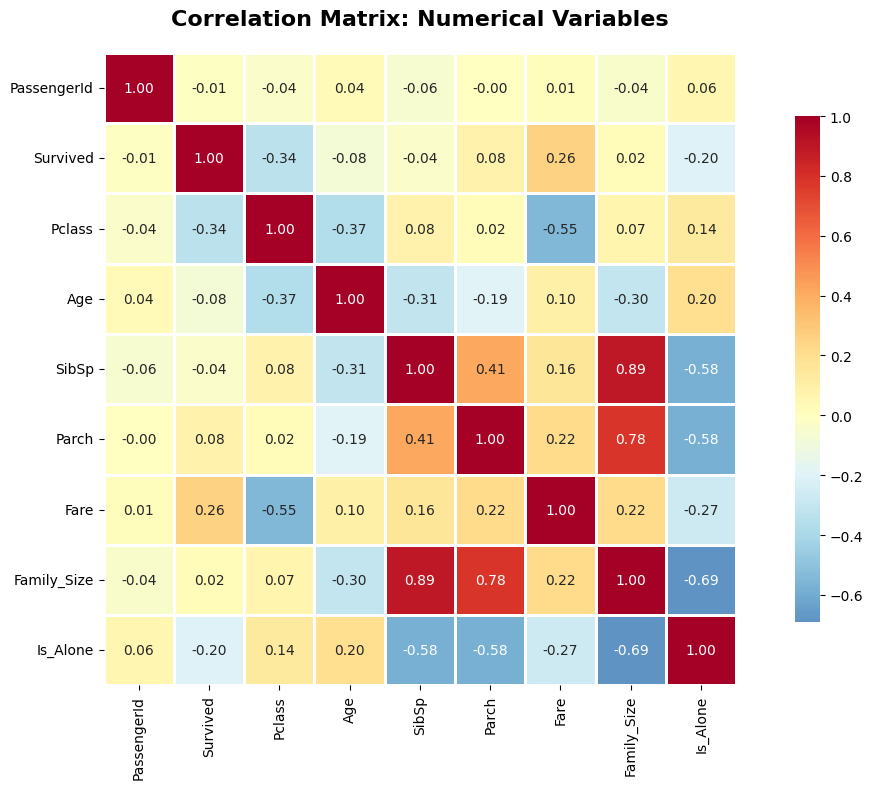

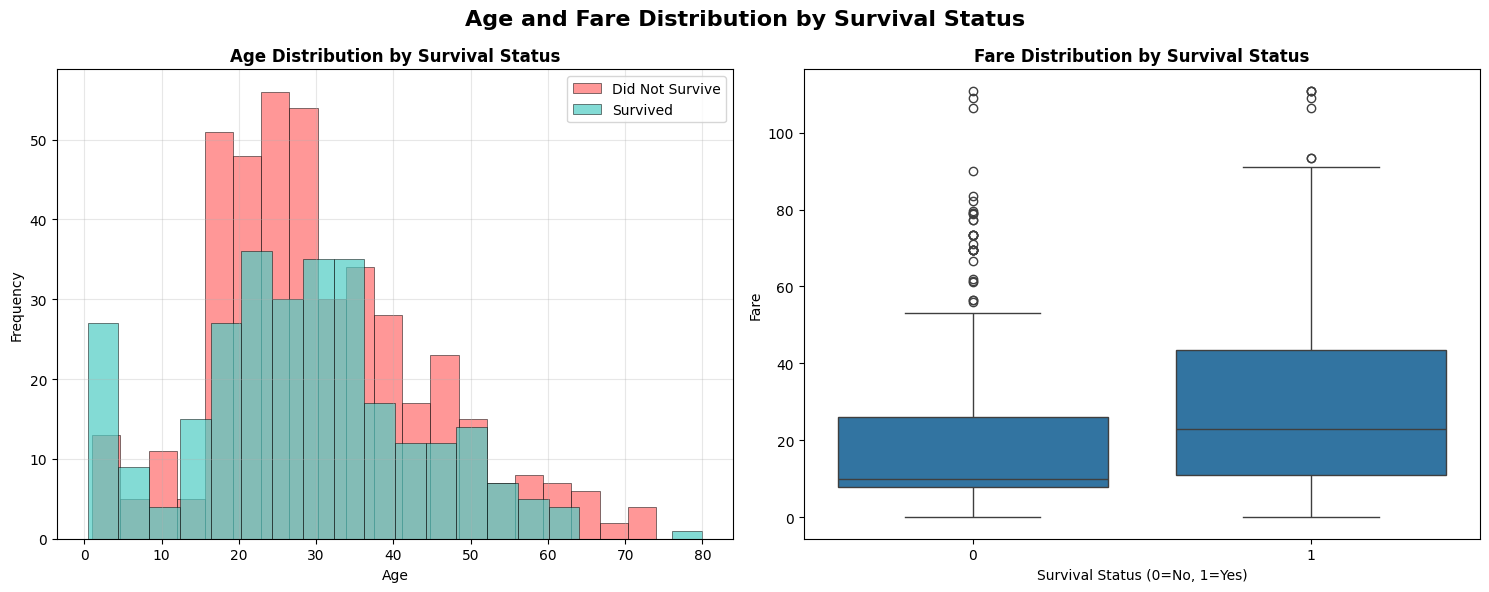

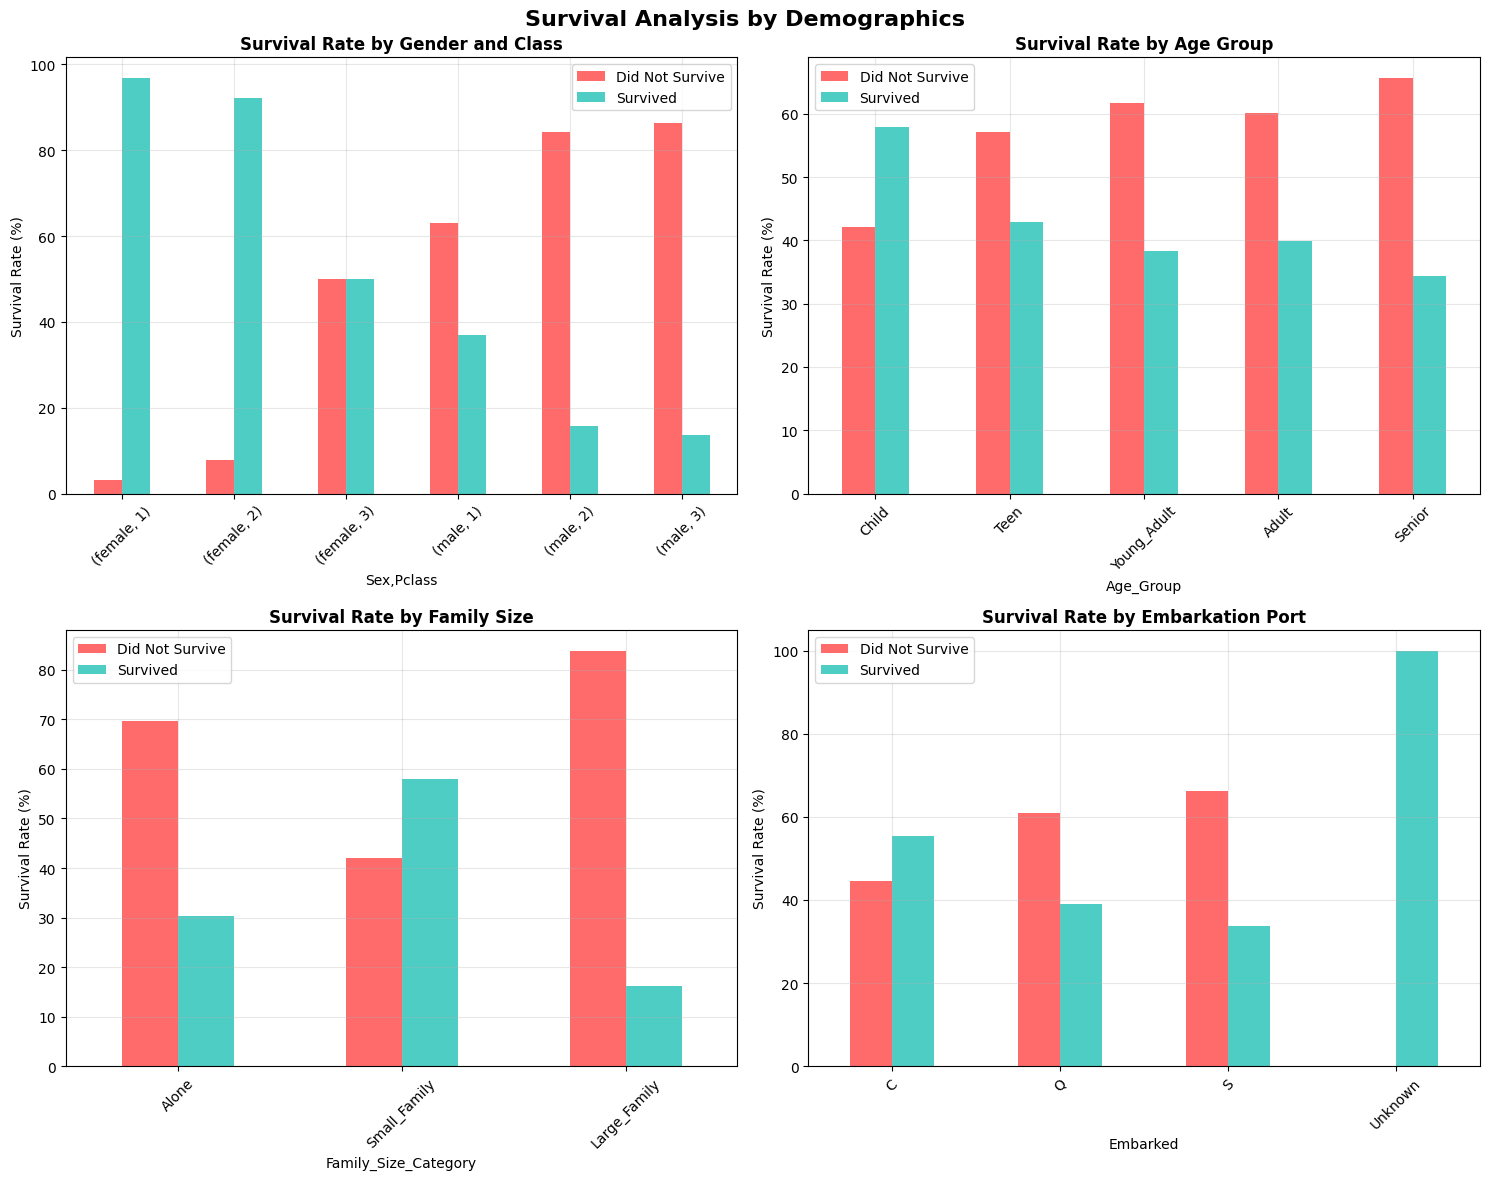

In [13]:
class SurvivalAnalyzer:
    """Comprehensive survival analysis utilities."""
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.survival_column = 'Survived'
    
    def analyze_survival_rates(self):
        """Comprehensive survival rate analysis."""
        print("\nSURVIVAL ANALYSIS")
        print("=" * 60)
        
        # Overall survival rate
        total_passengers = len(self.dataframe)
        total_survivors = self.dataframe[self.survival_column].sum()
        overall_survival_rate = (total_survivors / total_passengers) * 100
        
        print("Overall Statistics:")
        print("-" * 30)
        print(f"Total Passengers: {total_passengers:,}")
        print(f"Survivors: {total_survivors:,}")
        print(f"Overall Survival Rate: {overall_survival_rate:.2f}%")
        
        # Survival by key demographics
        self._analyze_survival_by_demographics()
        
        return overall_survival_rate
    
    def _analyze_survival_by_demographics(self):
        """Analyze survival rates by different demographic factors."""
        demographic_factors = ['Sex', 'Pclass', 'Age_Group', 'Family_Size_Category']
        
        for factor in demographic_factors:
            if factor in self.dataframe.columns:
                print(f"\nSurvival Rate by {factor}:")
                print("-" * 40)
                
                survival_analysis = pd.crosstab(
                    self.dataframe[factor], 
                    self.dataframe[self.survival_column], 
                    normalize='index'
                ) * 100
                
                # Format the output nicely
                if 1 in survival_analysis.columns:
                    survival_rates = survival_analysis[1].round(2)
                    for category, rate in survival_rates.items():
                        print(f"{str(category):<20}: {rate:>6.2f}%")
    
    def create_survival_visualizations(self):
        """Create comprehensive survival analysis visualizations."""
        print("\nCreating Survival Analysis Visualizations...")
        
        # Correlation heatmap
        self._create_correlation_heatmap()
        
        # Age and fare distribution by survival
        self._create_age_fare_survival_plots()
        
        # Survival by demographics
        self._create_demographic_survival_plots()
    
    def _create_correlation_heatmap(self):
        """Create correlation matrix heatmap."""
        plt.figure(figsize=(12, 8))
        
        numerical_columns = self.dataframe.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.dataframe[numerical_columns].corr()
        
        # Create heatmap with enhanced styling
        sns.heatmap(
            correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True, 
            linewidths=0.8,
            fmt='.2f',
            cbar_kws={'shrink': 0.8}
        )
        
        plt.title('Correlation Matrix: Numerical Variables', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    
    def _create_age_fare_survival_plots(self):
        """Create age and fare distribution plots by survival status."""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('Age and Fare Distribution by Survival Status', 
                    fontsize=16, fontweight='bold')
        
        # Age distribution by survival
        survival_labels = ['Did Not Survive', 'Survived']
        colors = ['#FF6B6B', '#4ECDC4']
        
        for idx, survival_status in enumerate([0, 1]):
            age_data = self.dataframe[self.dataframe[self.survival_column] == survival_status]['Age'].dropna()
            axes[0].hist(age_data, alpha=0.7, label=survival_labels[idx], 
                        color=colors[idx], bins=20, edgecolor='black', linewidth=0.5)
        
        axes[0].set_title('Age Distribution by Survival Status', fontweight='bold')
        axes[0].set_xlabel('Age')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Fare distribution by survival (removing extreme outliers for better visualization)
        if 'Fare' in self.dataframe.columns:
            fare_threshold = self.dataframe['Fare'].quantile(0.95)
            filtered_data = self.dataframe[self.dataframe['Fare'] <= fare_threshold]
            
            sns.boxplot(data=filtered_data, x=self.survival_column, y='Fare', ax=axes[1])
            axes[1].set_title('Fare Distribution by Survival Status', fontweight='bold')
            axes[1].set_xlabel('Survival Status (0=No, 1=Yes)')
            axes[1].set_ylabel('Fare')
        
        plt.tight_layout()
        plt.show()
    
    def _create_demographic_survival_plots(self):
        """Create demographic survival analysis plots."""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Survival Analysis by Demographics', fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        plot_configs = [
            ('Sex', 'Pclass', 'Survival Rate by Gender and Class'),
            ('Age_Group', None, 'Survival Rate by Age Group'),
            ('Family_Size_Category', None, 'Survival Rate by Family Size'),
            ('Embarked', None, 'Survival Rate by Embarkation Port')
        ]
        
        for idx, (primary_col, secondary_col, title) in enumerate(plot_configs):
            if primary_col in self.dataframe.columns:
                if secondary_col and secondary_col in self.dataframe.columns:
                    # Two-dimensional analysis
                    survival_data = pd.crosstab(
                        [self.dataframe[primary_col], self.dataframe[secondary_col]], 
                        self.dataframe[self.survival_column], 
                        normalize='index'
                    ) * 100
                else:
                    # Single dimension analysis
                    if primary_col == 'Embarked':
                        data_to_analyze = self.dataframe[primary_col].fillna('Unknown')
                    else:
                        data_to_analyze = self.dataframe[primary_col]
                    
                    survival_data = pd.crosstab(
                        data_to_analyze, 
                        self.dataframe[self.survival_column], 
                        normalize='index'
                    ) * 100
                
                survival_data.plot(kind='bar', ax=axes[idx], color=['#FF6B6B', '#4ECDC4'])
                axes[idx].set_title(title, fontweight='bold')
                axes[idx].set_ylabel('Survival Rate (%)')
                axes[idx].legend(['Did Not Survive', 'Survived'])
                axes[idx].tick_params(axis='x', rotation=45)
                axes[idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Perform survival analysis
if 'enhanced_titanic_data' in locals():
    survival_analyzer = SurvivalAnalyzer(enhanced_titanic_data)
    overall_survival_rate = survival_analyzer.analyze_survival_rates()
    survival_analyzer.create_survival_visualizations()


In [ ]:
# INSIGHTS AND RECOMMENDATIONS

In [14]:
class InsightGenerator:
    """Generate actionable insights from the analysis."""
    
    def __init__(self, dataframe, survival_rate):
        self.dataframe = dataframe
        self.overall_survival_rate = survival_rate
    
    def generate_comprehensive_insights(self):
        """Generate comprehensive insights and recommendations."""
        print("\nKEY INSIGHTS AND FINDINGS")
        print("=" * 70)
        
        insights = self._calculate_key_metrics()
        self._display_insights(insights)
        self._provide_recommendations()
        
        return insights
    
    def _calculate_key_metrics(self):
        """Calculate key metrics for insight generation."""
        insights = {}
        
        # Gender-based insights
        if 'Sex' in self.dataframe.columns:
            female_survival_rate = (
                self.dataframe[self.dataframe['Sex'] == 'female']['Survived'].mean() * 100
            )
            male_survival_rate = (
                self.dataframe[self.dataframe['Sex'] == 'male']['Survived'].mean() * 100
            )
            insights['female_survival_rate'] = female_survival_rate
            insights['male_survival_rate'] = male_survival_rate
        
        # Class-based insights
        if 'Pclass' in self.dataframe.columns:
            for passenger_class in [1, 2, 3]:
                class_survival_rate = (
                    self.dataframe[self.dataframe['Pclass'] == passenger_class]['Survived'].mean() * 100
                )
                insights[f'class_{passenger_class}_survival_rate'] = class_survival_rate
        
        # Age-based insights
        if 'Age_Group' in self.dataframe.columns:
            child_mask = self.dataframe['Age_Group'] == 'Child'
            if child_mask.any():
                child_survival_rate = (
                    self.dataframe[child_mask]['Survived'].mean() * 100
                )
                insights['child_survival_rate'] = child_survival_rate
        
        # Family size insights
        if 'Is_Alone' in self.dataframe.columns:
            alone_survival_rate = (
                self.dataframe[self.dataframe['Is_Alone'] == 1]['Survived'].mean() * 100
            )
            with_family_survival_rate = (
                self.dataframe[self.dataframe['Is_Alone'] == 0]['Survived'].mean() * 100
            )
            insights['alone_survival_rate'] = alone_survival_rate
            insights['with_family_survival_rate'] = with_family_survival_rate
        
        return insights
    
    def _display_insights(self, insights):
        """Display formatted insights."""
        print("\nPRIMARY FINDINGS:")
        print("-" * 50)
        
        if 'female_survival_rate' in insights and 'male_survival_rate' in insights:
            print(f"Female Survival Rate: {insights['female_survival_rate']:.1f}%")
            print(f"Male Survival Rate: {insights['male_survival_rate']:.1f}%")
            gender_difference = insights['female_survival_rate'] - insights['male_survival_rate']
            print(f"Gender Survival Gap: {gender_difference:.1f} percentage points")
        
        print("\nCLASS-BASED SURVIVAL RATES:")
        print("-" * 30)
        for passenger_class in [1, 2, 3]:
            key = f'class_{passenger_class}_survival_rate'
            if key in insights:
                class_name = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}[passenger_class]
                print(f"{class_name:<15}: {insights[key]:.1f}%")
        
        if 'child_survival_rate' in insights:
            print(f"\nChild Survival Rate: {insights['child_survival_rate']:.1f}%")
        
        if 'alone_survival_rate' in insights and 'with_family_survival_rate' in insights:
            print("\nFAMILY IMPACT:")
            print("-" * 20)
            print(f"Traveling Alone: {insights['alone_survival_rate']:.1f}%")
            print(f"With Family: {insights['with_family_survival_rate']:.1f}%")
    
    def _provide_recommendations(self):
        """Provide data-driven recommendations."""
        print("\nDATA QUALITY RECOMMENDATIONS:")
        print("-" * 50)
        
        missing_info = self.dataframe.isnull().sum()
        missing_columns = missing_info[missing_info > 0].index.tolist()
        
        if missing_columns:
            print("Missing Data Issues:")
            for column in missing_columns:
                missing_count = missing_info[column]
                missing_percent = (missing_count / len(self.dataframe)) * 100
                print(f"   * {column}: {missing_count} records ({missing_percent:.1f}%)")
                
                # Provide specific recommendations
                if column == 'Age':
                    print("     -> Recommendation: Use median imputation or predictive modeling")
                elif column == 'Cabin':
                    print("     -> Recommendation: Create 'Has_Cabin' binary feature")
                elif column == 'Embarked':
                    print("     -> Recommendation: Fill with most frequent port (mode)")
        
        print("\nBUSINESS INSIGHTS:")
        print("-" * 30)
        print("* Gender was the strongest predictor of survival")
        print("* Passenger class significantly influenced survival chances")
        print("* Children had higher survival rates than adults")
        print("* Family size impacted survival outcomes")

# Generate comprehensive insights
if 'enhanced_titanic_data' in locals() and 'overall_survival_rate' in locals():
    insight_generator = InsightGenerator(enhanced_titanic_data, overall_survival_rate)
    final_insights = insight_generator.generate_comprehensive_insights()



KEY INSIGHTS AND FINDINGS

PRIMARY FINDINGS:
--------------------------------------------------
Female Survival Rate: 74.2%
Male Survival Rate: 18.9%
Gender Survival Gap: 55.3 percentage points

CLASS-BASED SURVIVAL RATES:
------------------------------
First Class    : 63.0%
Second Class   : 47.3%
Third Class    : 24.2%

Child Survival Rate: 58.0%

FAMILY IMPACT:
--------------------
Traveling Alone: 30.4%
With Family: 50.6%

DATA QUALITY RECOMMENDATIONS:
--------------------------------------------------
Missing Data Issues:
   * Age: 177 records (19.9%)
     -> Recommendation: Use median imputation or predictive modeling
   * Cabin: 687 records (77.1%)
     -> Recommendation: Create 'Has_Cabin' binary feature
   * Embarked: 2 records (0.2%)
     -> Recommendation: Fill with most frequent port (mode)
   * Age_Group: 177 records (19.9%)

BUSINESS INSIGHTS:
------------------------------
* Gender was the strongest predictor of survival
* Passenger class significantly influenced surviv

In [ ]:
# PROJECT SUMMARY AND EXPORT

In [15]:
class ProjectSummarizer:
    """Summarize project results and export data."""
    
    def __init__(self, dataframe, output_filename):
        self.dataframe = dataframe
        self.output_filename = output_filename
    
    def create_project_summary(self):
        """Create comprehensive project summary."""
        print("\nPROJECT COMPLETION SUMMARY")
        print("=" * 70)
        
        # Dataset summary
        print("\nFINAL DATASET OVERVIEW:")
        print("-" * 40)
        print(f"Dataset Shape: {self.dataframe.shape}")
        print(f"Total Records: {len(self.dataframe):,}")
        print(f"Total Features: {len(self.dataframe.columns)}")
        print(f"Memory Usage: {self.dataframe.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Feature summary
        numerical_features = self.dataframe.select_dtypes(include=[np.number]).columns
        categorical_features = self.dataframe.select_dtypes(include=['object', 'category']).columns
        
        print("\nFeature Breakdown:")
        print("-" * 25)
        print(f"Numerical Features: {len(numerical_features)}")
        print(f"Categorical Features: {len(categorical_features)}")
        
        # Analysis summary
        print("\nANALYSIS COMPLETED:")
        print("-" * 30)
        print("* Data Loading & Validation")
        print("* Data Quality Assessment")
        print("* Exploratory Data Analysis")
        print("* Feature Engineering")
        print("* Survival Analysis")
        print("* Statistical Insights")
        print("* Data Visualization")
        
        # Export enhanced dataset
        self._export_enhanced_dataset()
        
        print("\nNEXT STEPS:")
        print("-" * 20)
        print("* Machine Learning Model Development")
        print("* Advanced Feature Engineering")
        print("* Cross-Validation and Model Selection")
        print("* Hyperparameter Tuning")
        print("* Model Deployment Preparation")
    
    def _export_enhanced_dataset(self):
        """Export the enhanced dataset with new features."""
        try:
            self.dataframe.to_csv(self.output_filename, index=False)
            print(f"\nEnhanced Dataset Exported: '{self.output_filename}'")
            print("Export includes all engineered features and analysis results")
        except Exception as error:
            print(f"Export Error: {error}")

# Create project summary and export
if 'enhanced_titanic_data' in locals():
    project_summarizer = ProjectSummarizer(enhanced_titanic_data, OUTPUT_FILENAME)
    project_summarizer.create_project_summary()

    print("\nTITANIC DATA ANALYSIS PROJECT COMPLETED SUCCESSFULLY!")
    print("=" * 70)
    print("Full analysis report generated with professional insights")
    print("Enhanced dataset ready for machine learning workflows")
    print(f"{len(enhanced_titanic_data.columns)} features available for modeling")
else:
    print("Error: Dataset not loaded successfully. Please check your internet connection.")

print("\nCode execution completed!")


PROJECT COMPLETION SUMMARY

FINAL DATASET OVERVIEW:
----------------------------------------
Dataset Shape: (891, 18)
Total Records: 891
Total Features: 18
Memory Usage: 0.34 MB

Feature Breakdown:
-------------------------
Numerical Features: 9
Categorical Features: 9

ANALYSIS COMPLETED:
------------------------------
* Data Loading & Validation
* Data Quality Assessment
* Exploratory Data Analysis
* Feature Engineering
* Survival Analysis
* Statistical Insights
* Data Visualization

Enhanced Dataset Exported: 'enhanced_titanic_dataset.csv'
Export includes all engineered features and analysis results

NEXT STEPS:
--------------------
* Machine Learning Model Development
* Advanced Feature Engineering
* Cross-Validation and Model Selection
* Hyperparameter Tuning
* Model Deployment Preparation

TITANIC DATA ANALYSIS PROJECT COMPLETED SUCCESSFULLY!
Full analysis report generated with professional insights
Enhanced dataset ready for machine learning workflows
18 features available for 